<h2> Objectif :</h2>
 le but de ce TP est de comparer les 4 méthodes d'intégrations numériques.
<br> Celui-ci, nous aidera à déterminer la différence entre la valeur exacte d'un intégral et les valeurs approchées dégagées par ces dernieres méthodes 

<h2>Principes </h2>
Il est généralement difficile de calculer la surface d'une courbe dans l'espace. Cependant, il existe des méthodes numériques toutes les heures pour nous rapprocher de la valeur exacte de la zone. Le principe principal et commun de ces méthodes est d'exprimer toute courbe par la somme de petites formes géométriques connues. Définissez f comme une fonction continue sur l'intervalle [a, b]. Souvent, nous ne savons pas comment calculer la primitive de f. Par conséquent, si nous voulons obtenir (𝑥) 𝑑𝑥, . La plupart des méthodes d'intégration numérique fonctionnent sur le même principe. Nous divisons d'abord le grand intervalle [a, b] en N intervalles plus petits [ai, ai + 1], où a1 = a et aN + 1 = b


<h3> Partie 1:</h3>

## Methodes des rectangles 
La méthode des rectangles à droite : on approche par . Géométriquement, cela signifie qu'on approche l'intégrale de f par l'aire des rectangles hachurés.

In [19]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

In [20]:
f=lambda x:1/(1+x**2)

In [21]:
class RectangleG ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        x= self.x
        y= f( x )
        h = float( x[1] - x[0] )
        s = sum( y[ 0 : -1 ] )
        return h * s
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( 'x' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des rectangles gauches' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [22]:
R=RectangleG(-1,1,20,f)

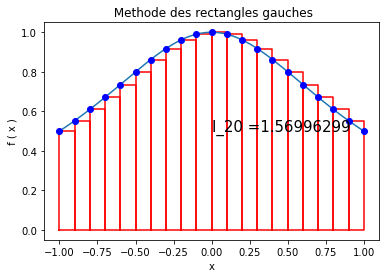

In [23]:
R.Graph(f)

In [24]:
np.pi/2

1.5707963267948966

>>cette methode consiste à diviser  la surface en des petits rectangles de coordonées :
<br>Abscisses des sommets: x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] 
<br>Ordonnées des sommets y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ]
<br> cette méthode a une marge d'erreur remarquable si le nombre d'échantillons est réduit.
Mais, on peut s'y débarraser tout en augmentant l'échantillonage. 

In [25]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

In [26]:
def simul(n,f):
    R=RectangleG(-1,1,n,f)
    return R.Graph(f)

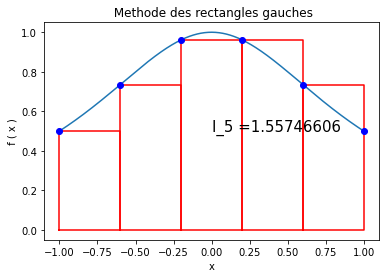

In [27]:
simul(5,f)


La courbe ci-dessus met en évidence que même si la fonction f est la même, la valeur approximative de l'intégrale est complètement différente du calcul précédent (1.55746606 <> 1.5707963267948966) => Augmenter le nombre d'échantillons n => La valeur intégrale estimée est proche de la vitesse précise

In [28]:
interact(simul,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f', o…

>>La fonction d'interaction permet de mieux interagir avec la courbe en sélectionnant n rectangles. Il permet à l'aire du rectangle ombré de représenter l'approximation de l'intégrale de f 

<br>La répétition du processus de division plus fine de l'intervalle permet de réduire l'amplitude du cadrage obtenu, augmentant ainsi la précision de la valeur intégrale recherchée.


<h3> Partie 2:</h3>

## Méthodes des trapézes
Idée-clé : En approchant l'aire du domaine par la somme des aires des trapèzes , nous obtenons une approximation plus précise de cette aire qu'en approchant l'aire du domaine par la somme des aires des rectangles ('' méthode des rectangles '').
Nous avons vu l’approche de l’aire sous une courbe à l’aide de la méthode de
Riemann qui consiste à découper l’aire sous la courbe en deux séries de rectangles
(l’une minorante et l’autre majorante). Les deux séries de rectangles tendent vers
l’intégrale lorsque le découpage tend vers l’infini. On peut alors prendre l’une
des deux séries pour donner une approximation de cette aire. L’approximation
sera d’autant meilleure que le découpage est important.
On peut améliorer la vitesse de convergence de cette approximation en remplaçant les rectangles par des trapèzes <br>

In [29]:
class Trapezoidal(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des Trapèzes' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [30]:
def sim(n,f):
    R=RectangleG(-1,1,n,f)
    T=Trapezoidal(-1,1,n,f) 
    fig= plt.figure(figsize=(12,4))
    plt.subplot(121)
    R.Graph(f)  
    plt.subplot(122)    
    T.Graph(f)
    plt.show()

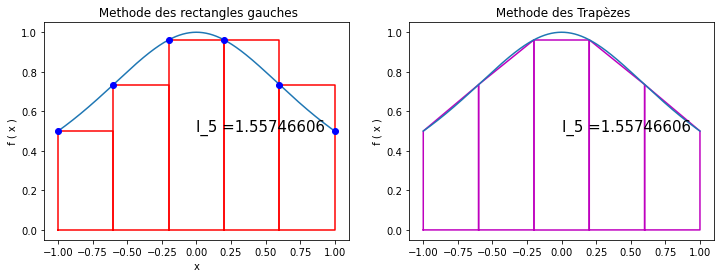

In [31]:
sim(5,f)

>> La fonction f est une fonction symétrique par rapport à l'axe Y. Cette fonctionnalité permet d'ajouter l'aire qui n'est pas calculée dans la partie [-1,0.25] dans la partie [0.25, 1] ​​​​De plus, comme le montre la figure ci-dessus, la valeur de surface donnée par la méthode trapézoïdale est la même que la méthode précédente.


In [32]:
interact(simul,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f', o…

In [33]:
interact(sim,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f', o…

<h3> Partie 3:</h3>

## Point milieu
La méthode d'Euler est une procédure numérique qui permet de résoudre de façon approximative des équations différentielles ordinaires du premier ordre avec condition initiale. Elle a le mérite d'être simple à comprendre et à programmer.

On cherche donc une solution approchée d'une équation ordinaire .

 une fonction suffisamment régulière pour que l'existence et l'unicité de la solution ne pose pas de problème.



In [34]:
class PointMilieu(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = 0
        for i in range(self,n):
            s=s+f((x[i]+x[i+1])*0.5)
        return h * s
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            m=(xl[i]+xl[i+1])/2
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , f(m), f(m)  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"r")
            plt.plot(m,f(m),"bo")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.xlabel ( ' x ' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des milieu' )
        #plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [35]:
def simull(n,f):
    P=PointMilieu(-1,1,n,f)
    return P.Graph(f)

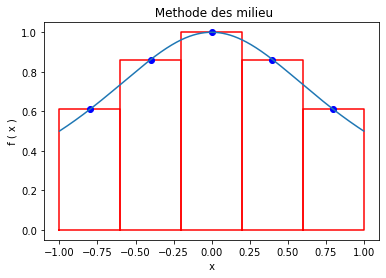

In [36]:
simull(5,f)

In [37]:
def sim1(n,f):
    R=RectangleG(-1,1,n,f)
    T=Trapezoidal(-1,1,n,f) 
    M=PointMilieu(-1,1,n,f)
    fig= plt.figure(figsize=(12,9))
    plt.subplot(221)
    R.Graph(f)  
    plt.subplot(222)    
    T.Graph(f)
    plt.subplot(223)
    M.Graph(f)
    plt.show()

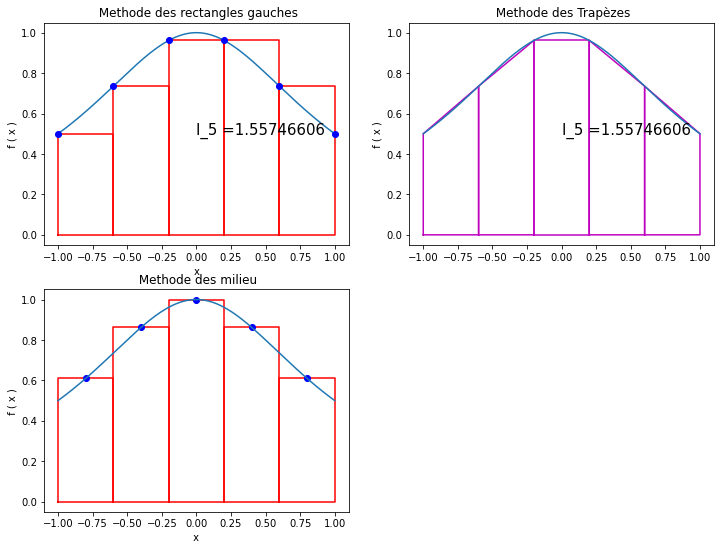

In [38]:
sim1(5,f)

In [39]:
interact(sim1,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f', o…

In [40]:
class Simpson(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        n=len(x)
        s= 0
        for i in range(0, n):
            Xi = self.a + (self.b - self.a) * i/float(n)
            Xj = self.a+ (self.b - self.a) * (i + 1)/float(self.n)
            s += (Xj - Xi) * (f(Xi) + 4.0*f((Xi + Xj)/2.0) + f(Xj))/6.0
            s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        aa=self.a
        bb=self.b
        m=(aa+bb)/2
        xlist_fine=np.linspace(self.a, self.b, resolution)
        xx=xlist_fine
        for i in range ( self.n ) :

            l0=(xx-bb)/(aa-bb)*(xx-m)/(aa-m)
            l1=(xx-aa)/(m-aa)*(xx-bb)/(m-bb) 
            l2= (xx-aa)/(bb-aa)*(xx-m)/(bb-m)
            p=f(aa)*l0+f(m)*l1+f(bb)*l2 #polynome
            plt.plot ( xx , p , 'b' ) 
            #plt.plot(m,f(m),"r")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine,"g")#plot de f(x)
        plt.plot(xl, yl,'bo')#point support
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Simpson' )
        #plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [41]:
def simula(n,f):
    S=Simpson(-1,1,n,f)
    return S.Graph(f)

3.1230769230769218

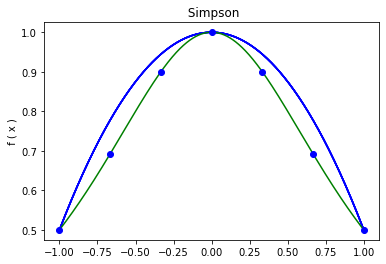

In [42]:
simula(6,f)
Simpson(-1,1,6,f).integrate(f)

# CONCLUSION GENERALE :
>Le troisième TP se concentre sur chaque méthode d'intégration numérique et les différences entre elles. Par conséquent, plus la méthode de Newton-Cotes basée sur des polynômes d'ordre élevé est simple, plus la vitesse est lente et plus la difficulté de codage est grande, mais plus la précision est élevée. En pratique, la situation la plus courante est que le domaine d'intégration totale [a, b] est trop grand et que la fonction change trop dans ce domaine, ces méthodes ne peuvent pas donner de résultats satisfaisants. Par conséquent, ils ne sont presque jamais utilisés de cette manière. Par conséquent, nous subdivisons l'ensemble du domaine [a, b] en un grand nombre de cellules, et nous pouvons appliquer avec succès la méthode simple de Newton-Cotes .